In [4]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.Image as img
import os
import pathlib

from tensorflow import keras
from tensorflow.keras import layers, Model, models

# Getting data from url

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


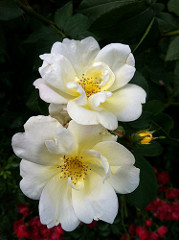

In [7]:
roses = list(data_dir.glob('roses/*'))
img.open(str(roses[0]))

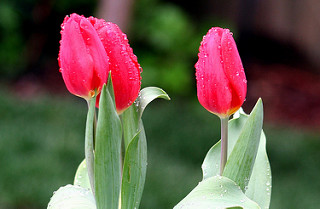

In [8]:
tulips = list(data_dir.glob('tulips/*'))
img.open(str(tulips[0]))

# Setting parameters to preprocesses the images.

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed = 123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size=(img_height,img_width),
    batch_size= batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Now that the files are preprocessed, let's build our CNN model!

## Conv2D(filters,kernel_size,activation,input_shape)
- filters: é o numero de filtros aplicados no input, sempre potências de dois e começar com 32 e ir aumentando com o tempo
- kernel_size: é uma tupla que depende do tamanho do input. se as imagens forem >128x128, usar (5,5) ou (7,7). Precisa ser sempre ímpar e ir diminuindo para até (3,3) nas camadas mais profundas.
- input_shape: é uma tupla que é (altura,largura,cores/profundidade), deve ser colocada somente na primeira camada


    Devemos usar também MaxPool2D para configurar a saida de Conv2D em dois eixos!

In [13]:
class conv(Model):
    def __init__(self,img_shape, number_of_classes):
        super(conv,self).__init__()
        if img_shape == None:
            print("Invalid input shape parameters!")
        else:
            #here begins the convolutional step
            self.conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_shape)) #lembrar de configurar direito esses parametros https://www.tensorflow.org/tutorials/images/cnn 
            self.pool1 = layers.MaxPooling2D((2,2))
            self.conv2 = layers.Conv2D(64,(3,3),activation='relu')
            self.pool2 = layers.MaxPooling2D((2,2))
            self.conv2 = layers.Conv2D(64,(3,3),activation ='relu')

    def call(self, inputs, number_of_classes):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv2(x)
        return x #this x is a tensor with three dimensions.


In [ ]:
class dense(Model):
    def __init__(self,)

# After passing through the CNN model, we may or may not pass it through some dense layers.
So, I'll implement some dense layers here :)
